In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor   #Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

%matplotlib inline



In [2]:
BostonData = pd.read_csv('https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/Boston.csv')
del BostonData['Unnamed: 0']
BostonData.dropna(inplace = True)
print(BostonData.head())
print(len(BostonData))

      crim  zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
506


In [3]:
X = BostonData[BostonData.columns.values]
del X['medv']
y = BostonData['medv']

# Decision Trees - Validation

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) of Decision Tree Regressor

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
treereg = DecisionTreeRegressor()
treereg.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [6]:
preds = treereg.predict(X_test)
MSE = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("Mean Squared Error of our test set is %f" %MSE)

Mean Squared Error of our test set is 3.432258


#### We learned that we should not rely on default setting of any class! So, let's play with the parameters of Decision Tree. In this section we use cross-validation. In what comes next we are going to fix random_state to a fix number so that in each iteration we work with the same set of random numbers. We do it to compare apples with apples!

#### You either tune a decision tree by setting up its depth - i.e. how many layers of splits you allow to have or by setting up the maximum number of leaf nodes i.e. terminal nodes. Since Maximum depth is used in Random Forests - Python users usually play with this parameter. In contrast, default prunnig in R is equivalent to tuning decision trees based on Max_Leaf_Nodes. You usually get very close results by trying either of the methods. 

# Tuning With Max_Leaf_Nodes

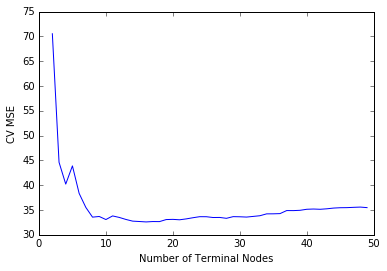

In [7]:
Maximum_Terminal_Nodes = range(2,50)
score = []
for i in Maximum_Terminal_Nodes :
        treereg = DecisionTreeRegressor(max_leaf_nodes = i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24)  #You could set random_state to any number
        score.append(-cross_val_score(treereg, X, y, cv=10, scoring = 'mean_squared_error').mean())

plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV MSE")
plt.show()



In [8]:
CV_MSE_Min = np.argmin(score)
Nodes_Min = Maximum_Terminal_Nodes[CV_MSE_Min]
print("The best number of Nodes is %i which results in MSE = %f" %(Nodes_Min, np.min(score)))

The best number of Nodes is 16 which results in MSE = 32.596115


When it comes to interpretation, we prefer simpler models. In this case, we would prefer Terminal_Nodes = 8.

# Tuning with Max_Depth


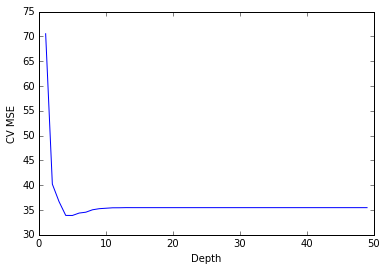

In [9]:
Maximum_Depth = range(1,50)
score = []
for i in Maximum_Depth:
        treereg = DecisionTreeRegressor(max_depth= i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24)  #You could set random_state to any number
        score.append(-cross_val_score(treereg, X, y, cv=10, scoring = 'mean_squared_error').mean())

plt.plot(Maximum_Depth, score)
plt.xlabel("Depth")
plt.ylabel("CV MSE")
plt.show()

In [10]:
CV_MSE_Min = np.argmin(score)
Depth_Max = Maximum_Depth[CV_MSE_Min]
print("The best option for Max Depth is %i which results in MSE = %f" %(Depth_Max, np.min(score)))

The best option for Max Depth is 5 which results in MSE = 33.897050


# Let's explore feature importance using optimal setting

In [11]:
treereg = DecisionTreeRegressor(max_depth = Maximum_Depth[CV_MSE_Min], 
                                min_samples_leaf = 5, 
                                random_state = 24)
treereg.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)


,feature,importance
5,rm,0.626736
12,lstat,0.228526
7,dis,0.067630
0,crim,0.034838
4,nox,0.020330
10,ptratio,0.011684
6,age,0.005146
9,tax,0.005110
1,zn,0.000000
2,indus,0.000000


### Installing Graphviz (optional):
* Mac:
    * option: Type "conda install graphviz"in your command line
* Windows:
     [Download and install MSI file](http://www.graphviz.org/Download_windows.php)
     * Add it to your Path: Go to Control Panel, System, Advanced System Settings, Environment Variables. Under system 
       variables,edit "Path" to include the path to the "bin" folder, such as: C:\Program Files (x86)\Graphviz2.38\bin

In [ ]:
"""
# This is how we can create a graphical summary of decision trees. We can creat .dot files and 
# then need to either use a software that can open dot files or change dot file to png files
# in command line and then open it. 
# create a Graphviz file
from sklearn.tree import export_graphviz
with open("dt1.dot", 'wb') as f:
    f = export_graphviz(treereg, out_file=f, feature_names=X.columns.values)
"""

# Decision-Trees - Classification

#### You can find documentiond on DecisionTreeClassifier [here](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [12]:

BostonData['medvCategory'] = '1'
mask_cat2 = ((BostonData['medv'] > BostonData['medv'].quantile(.2)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.5)))   
mask_cat3 = ((BostonData['medv'] > BostonData['medv'].quantile(.5)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.8)))  
mask_cat4 = (BostonData['medv'] > BostonData['medv'].quantile(.8)) 

BostonData.loc[mask_cat2,'medvCategory'] = '2'
BostonData.loc[mask_cat3,'medvCategory'] = '3'
BostonData.loc[mask_cat4,'medvCategory'] = '4'

In [13]:
del BostonData['medv']
X = BostonData[BostonData.columns.values]
del X['medvCategory']
y = BostonData['medvCategory']

#### To tune Decision Tree Classifiers we can either use max_depth or max_leaf_nodes

# Tune Using max_leaf_nodes

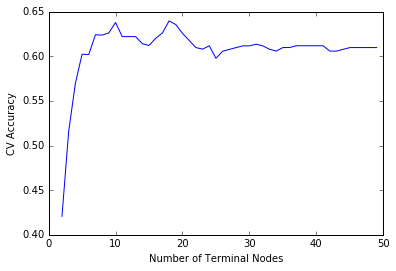

In [15]:
Maximum_Terminal_Nodes = range(2,50)
score = []
for i in Maximum_Terminal_Nodes:
    TreeClass = DecisionTreeClassifier(max_leaf_nodes = i, 
                                       min_samples_leaf = 5, 
                                       random_state = 24)
    score.append((cross_val_score(TreeClass, X, y, cv=10, scoring = 'accuracy')).mean())

plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV Accuracy")
plt.show()

In [16]:
CV_MSE_Max = np.argmax(score)
Maximum_Terminal_Node = Maximum_Terminal_Nodes[CV_MSE_Max]
print("The best option for maximum terminal node is %i which results in accuracy = %f" %(Maximum_Terminal_Node, np.max(score)))

The best option for maximum terminal node is 18 which results in accuracy = 0.639580


#### We should not forget that the simpler the better, so our ideal choice would be 10 nodes.

# Tune using Max Depth

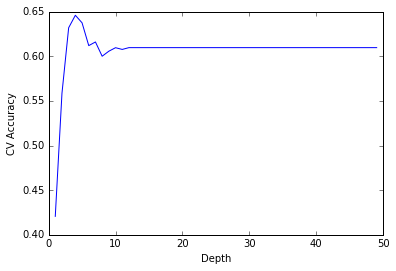

In [17]:
Maximum_Depth = range(1,50)
score = []
for i in Maximum_Depth:
    TreeClass = DecisionTreeClassifier(max_depth = i, 
                                       min_samples_leaf = 5, 
                                       random_state = 24)
    score.append((cross_val_score(TreeClass, X, y, cv=10, scoring = 'accuracy')).mean())

plt.plot(Maximum_Depth, score)
plt.xlabel("Depth")
plt.ylabel("CV Accuracy")
plt.show()

In [18]:
CV_MSE_Max = np.argmax(score)
Maximum_Depth = Maximum_Depth[CV_MSE_Max]

print("The best option for maximum depth is %i which results in accuracy = %f" %(Maximum_Depth, np.max(score)))

The best option for maximum depth is 4 which results in accuracy = 0.645883


# Final task: Let's find importance of variables

In [19]:
TreeClass = DecisionTreeClassifier(
                max_depth = 4,
                min_samples_leaf = 5,
                random_state = 24)

TreeClass.fit(X,y)

ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':TreeClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'], ascending = 0)

,feature,importance
12,lstat,0.441247
5,rm,0.366479
0,crim,0.130794
10,ptratio,0.043741
7,dis,0.017739
1,zn,0.000000
2,indus,0.000000
3,chas,0.000000
4,nox,0.000000
6,age,0.000000


In [ ]:

"""
from sklearn.tree import export_graphviz
from os import system 
model = DecisionTreeClassifier()
model.fit(X, y) 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                    out_file = dotfile,
                    feature_names = X.columns.values)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")

   
build_tree_image(model1)
"""